Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:

1.Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2.Dataset.
3.Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?
Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

What can you infer about the relationships between (1) the women, and (2) the social events?  

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite

In [13]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,10)

In [14]:
G = nx.davis_southern_women_graph()

In [15]:
women = G.graph['top']
clubs = G.graph['bottom']

In [16]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [17]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

Biadjacency matrix

In [18]:
print(bipartite.biadjacency_matrix(G, women, clubs))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


Women

In [20]:
W = bipartite.projected_graph(G, women)
print('')
print("Friends, Member")

W_degrees = {}
for w in women:
    W_degrees[w] = W.degree(w)

for w in sorted(W_degrees, key=W_degrees.get, reverse=True):
    print(W_degrees[w], w)


Friends, Member
17 Evelyn Jefferson
17 Theresa Anderson
17 Ruth DeSand
17 Verne Sanderson
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Brenda Rogers
15 Frances Anderson
15 Eleanor Nye
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


Women Weights

In [21]:
W = bipartite.weighted_projected_graph(G, women)
print('')
print("Friend Meetings, Member")
    
W_weights = {}
for w in women:
    W_weights[w] = W.degree(w, weight='weight')

for w in sorted(W_weights, key=W_weights.get, reverse=True):
    print(W_weights[w], w)


Friend Meetings, Member
57 Theresa Anderson
50 Evelyn Jefferson
46 Brenda Rogers
46 Sylvia Avondale
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Charlotte McDowd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


When we simply evaluate the degrees and weights, we can see a big difference in the strength of the connections. In terms of degree alone, nearly all women are almost equally linked, with just 3 women (Charlotte McDowd, Olivia Carleton, Flora Price) who has less connected than the others.

Looking at the weighted connections, we can see that there are two women (Theresa Anderson and Evelyn Jefferson) who have much more influence than the others and a more variable influence from top to bottom. Olivia Carleton and Flora Price are still significantly less influential, but Charlotte McDowd has more influence in their relationship despite fewer connections.

Women Graphs

In [22]:
weights=[data["weight"] for f, t, data in W.edges(data=True)]

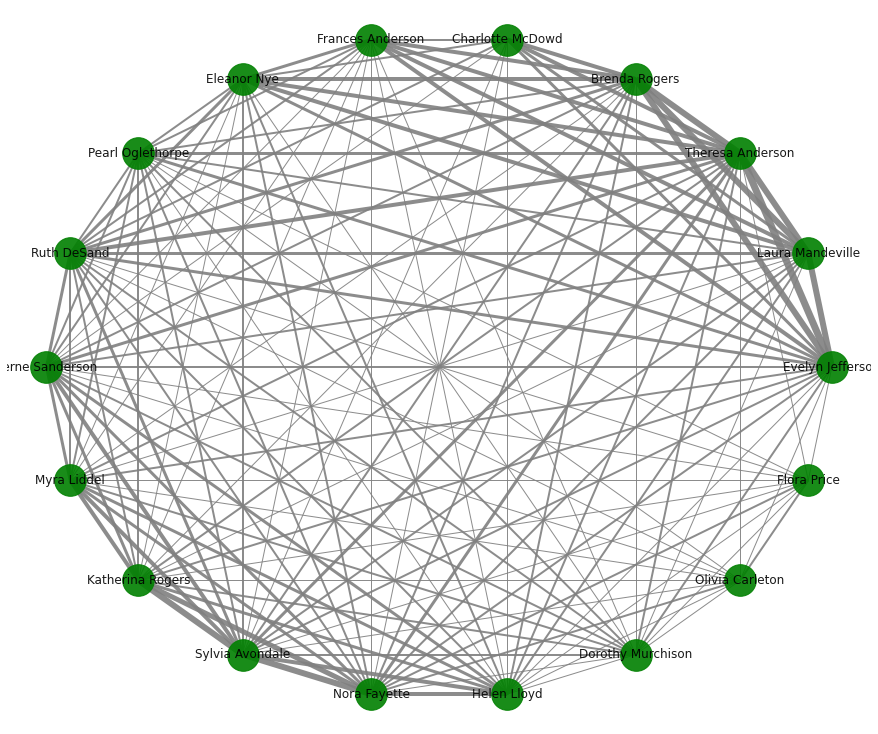

In [28]:
nx.draw_circular(W,width=weights, edge_color="gray", node_color="green", with_labels=True, node_size=1000, font_size=12, font_family="calibri", 
                alpha=0.9)